In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('C:\\Users\\sanji\\Downloads\\world development indicators\\Indicators.csv')
data.shape

(5656458, 6)

In [29]:
data.head(12)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [34]:
countries = data['CountryName'].unique().tolist()  #unique countries name
len(countries)

247

In [36]:
countryCode = data['CountryCode'].unique().tolist()    # unique country codes
len(countryCode)

247

In [37]:
indicators = data['IndicatorName'].unique().tolist()   # unique indicators
len(indicators)

1344

In [38]:
years = data['Year'].unique().tolist()        # years of data
len(years)

56

In [43]:
print(min(years)," to ", max(years))      # range of years

1960  to  2015


In [42]:
print(min(years)," to ",max(years))

1960  to  2015


In [47]:
#  CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

stage = data[mask1 & mask2]


In [48]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


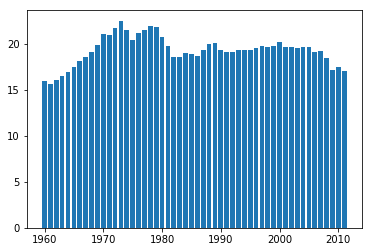

In [53]:
years = stage['Year'].values       # emissions have changed over time using MatplotLib
co2 = stage['Value'].values
plt.bar(years,co2)
plt.show()

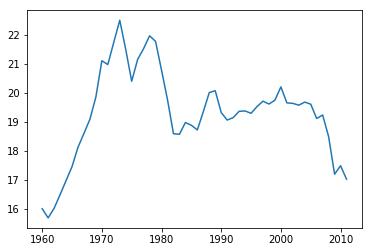

In [54]:
plt.plot(stage['Year'].values,stage['Value'].values)   # switching to a line plot

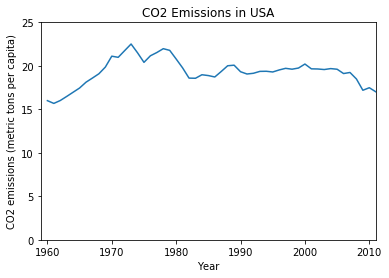

In [58]:
plt.plot(stage['Year'].values,stage['Value'].values) #ploting the information
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])
plt.title('CO2 Emissions in USA')
plt.axis([1959, 2011,0,25])
plt.show()

In [60]:
hist_data = stage['Value'].values          # Histograms to explore the distribution of values

In [61]:
print(len(hist_data))

52


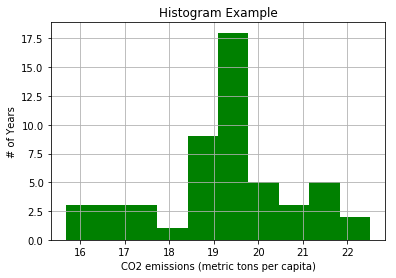

In [65]:
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

In [66]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [67]:
print(len(co2_2011))

232


C:\Users\sanji\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


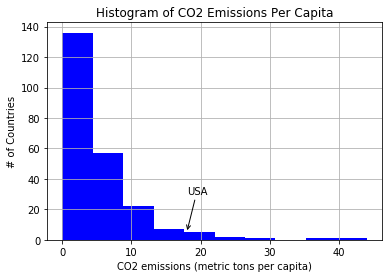

In [68]:
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, normed=False, facecolor='blue')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

In [69]:
# Relationship between GPD and CO2 Emissions

hist_indicator = 'GDP per capita \(constant 2005'    
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)
gdp_stage = data[mask1 & mask2]


In [70]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [71]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


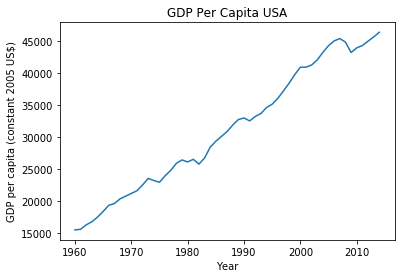

In [72]:
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
plt.title('GDP Per Capita USA')
plt.show()

In [73]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


In [74]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


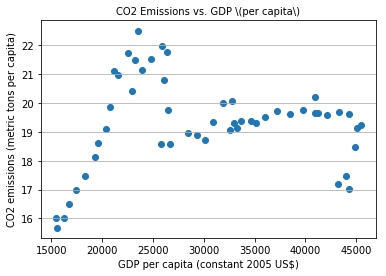

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)
X = gdp_stage_trunc['Value']
Y = stage['Value']
axis.scatter(X, Y)
plt.show()

In [76]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])